In [1]:
import sys
sys.path.append('..')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from typing import Sequence
import numpy as np
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)


In [2]:

def replace_kdo(arr):
    new_arr = []
    for i in arr:
        if 'KDO' in i:
            new_arr.append(i.replace('_KDO', ''))
        else:
            new_arr.append(i)
    return np.array(new_arr)

In [3]:
# df_C_all = pd.read_csv('results/labeled_results_all_carbon.csv')
df_C_all = pd.read_csv('experimental_data_combined/results_experiment_combined/third_round/with_kdo_labeled_results_all_carbon_test.csv')

In [4]:
df_C_all['atom_type'] = replace_kdo(df_C_all['atom_type'].values)
df_C_all = df_C_all.loc[:, ['0', '1', 'atom_type']]
df_C_all.columns = ['pred', 'act', 'atom_type']

# df_C_all.columns = ['act', 'pred', 'atom_type']

In [5]:
# df_C1 = df_C_all.loc[df_C_all['atom_type'] == 'C1', ['0', '1']]
# df_C1.index = range(len(df_C1))

# df_C2 = df_C_all.loc[df_C_all['atom_type'] == 'C2', ['0', '1']]
# df_C2.index = range(len(df_C2))

# df_C3 = df_C_all.loc[df_C_all['atom_type'] == 'C3', ['0', '1']]
# df_C3.index = range(len(df_C3))

# df_C4 = df_C_all.loc[df_C_all['atom_type'] == 'C4', ['0', '1']]
# df_C4.index = range(len(df_C4))

# df_C5 = df_C_all.loc[df_C_all['atom_type'] == 'C5', ['0', '1']]
# df_C5.index = range(len(df_C5))

# df_C6 = df_C_all.loc[df_C_all['atom_type'] == 'C6', ['0', '1']]
# df_C6.index = range(len(df_C6))

In [6]:
groups_c = df_C_all.groupby('atom_type')

In [7]:
# carbon_color_plate = ['#d68c22', '#cb6e34', '#b75540', '#9b4246', '#7b3447', '#582a40']
carbon_color_plate = ['#d68c22', '#cb6e34', '#b75540', '#9b4246', '#7b3447', '#582a40', '#B4C424', '#C9CC3F']

In [8]:
# carbon_name = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
carbon_name = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
colors_c = dict(zip(carbon_name, carbon_color_plate))

In [9]:
# df_C_all = pd.concat([df_C1, df_C2, df_C3, df_C4, df_C5, df_C6])
# df_C_all.index = range(len(df_C_all))

In [10]:
# df_H_all = pd.read_csv('results/labeled_results_all_hydrogen.csv')
df_H_all = pd.read_csv('experimental_data_combined/results_experiment_combined/labeled_results_all_hydrogen.csv')

df_H_all = df_H_all.loc[:, ['0', '1', 'atom_type']]
df_H_all.columns = ['pred', 'act', 'atom_type']
groups_h = df_H_all.groupby('atom_type')

# hydrogen_name = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H61', 'H62']
# hydrogen_color_plate = ['#22cbd6','#00b3cd','#009cc1','#0084b1','#066d9f','#205689','#2a3f71','#2d2a58']

hydrogen_name = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6']
hydrogen_color_plate = ['#22cbd6','#00b3cd','#009cc1','#0084b1','#066d9f','#205689']
colors_h = dict(zip(hydrogen_name, hydrogen_color_plate))

In [11]:
np.unique(df_H_all['atom_type'].values)

array(['H1', 'H2', 'H3', 'H4', 'H5', 'H6'], dtype=object)

In [12]:
# df_H1 = df_H_all.loc[df_H_all['atom_type'] == 'H1', ['0', '1']]
# df_H1.index = range(len(df_H1))

# df_H2 = df_H_all.loc[df_H_all['atom_type'] == 'H2', ['0', '1']]
# df_H2.index = range(len(df_H2))

# df_H3 = df_H_all.loc[df_H_all['atom_type'] == 'H3', ['0', '1']]
# df_H3.index = range(len(df_H3))

# df_H4 = df_H_all.loc[df_H_all['atom_type'] == 'H4', ['0', '1']]
# df_H4.index = range(len(df_H4))

# df_H5 = df_H_all.loc[df_H_all['atom_type'] == 'H5', ['0', '1']]
# df_H5.index = range(len(df_H5))

# df_H6 = df_H_all.loc[df_H_all['atom_type'] == 'H6', ['0', '1']]
# df_H6.index = range(len(df_H6))
# df_H61 = df_H_all.loc[df_H_all['atom_type'] == 'H61', ['0', '1']]
# df_H61.index = range(len(df_H61))
# df_H62 = df_H_all.loc[df_H_all['atom_type'] == 'H62', ['0', '1']]
# df_H62.index = range(len(df_H62))

In [13]:
# df_H_all = pd.concat([df_H1, df_H2, df_H3, df_H4, df_H5, df_H6, df_H61, df_H62])
# df_H_all.index = range(len(df_H_all))

In [34]:

def plot_shift(df, ax, i, set_title_name = '', sep = 5, xlab_name = '', ylab_name = '', 
               color = 'grey', groups = None, color_plate_dict = None, ms = 2):
    acctual_shit_1 = df['act'].values
    predict_shit_1 = df['pred'].values
    low_limit = np.min([np.min(np.abs(acctual_shit_1)), np.min(np.abs(predict_shit_1))]) * 0.9
    up_limit = np.max([np.max(np.abs(acctual_shit_1)), np.max(np.abs(predict_shit_1))]) * 1.1

    sns.set_theme()
    sns.set_style("whitegrid")
    x = np.linspace(low_limit, up_limit)
    ax[i].plot(x, x, color=color, alpha=0.25, zorder=0)
    
#     ax[i].scatter(acctual_shit_1, predict_shit_1, s = 20, label = 'A', linewidths=0, color=color)
    for name, group in groups:
        ax[i].plot(group.pred, group.act, marker='o', linestyle='', ms=ms, label=name, color = color_plate_dict[name])
    
    ax[i].ticklabel_format(style="sci", scilimits=(-4, 4))
    ax[i].axis('square')
    
    ax[i].set_title(f'{set_title_name}', size = font_size)
    ax[i].set_ylim(low_limit, up_limit)
    ax[i].set_xlim(low_limit, up_limit)
#     ax[i].grid()
    grid_x_ticks = np.arange(low_limit, up_limit, (up_limit - low_limit) / sep)
    grid_y_ticks = np.arange(low_limit, up_limit, (up_limit - low_limit) / sep)
    
    ax[i].set_xlabel(xlab_name, loc="center", size = font_size)
    ax[i].set_ylabel(ylab_name, loc="center", size = font_size)
#     ax[i].yaxis.set_label_coords(x = y_lab_xcoordinate, y = 0.5)
    
    ax[i].set_xticks(grid_x_ticks , minor=True)
    
    
    ax[i].set_yticks(grid_y_ticks , minor=True)
    
    ax[i].xaxis.set_tick_params(labelsize=ticksize)
    ax[i].yaxis.set_tick_params(labelsize=ticksize)
    
    ax[i].grid(which='both')

    ax[i].grid(which='minor', alpha=1, linestyle='-')
    ax[i].legend(fontsize = 18, markerscale=3)



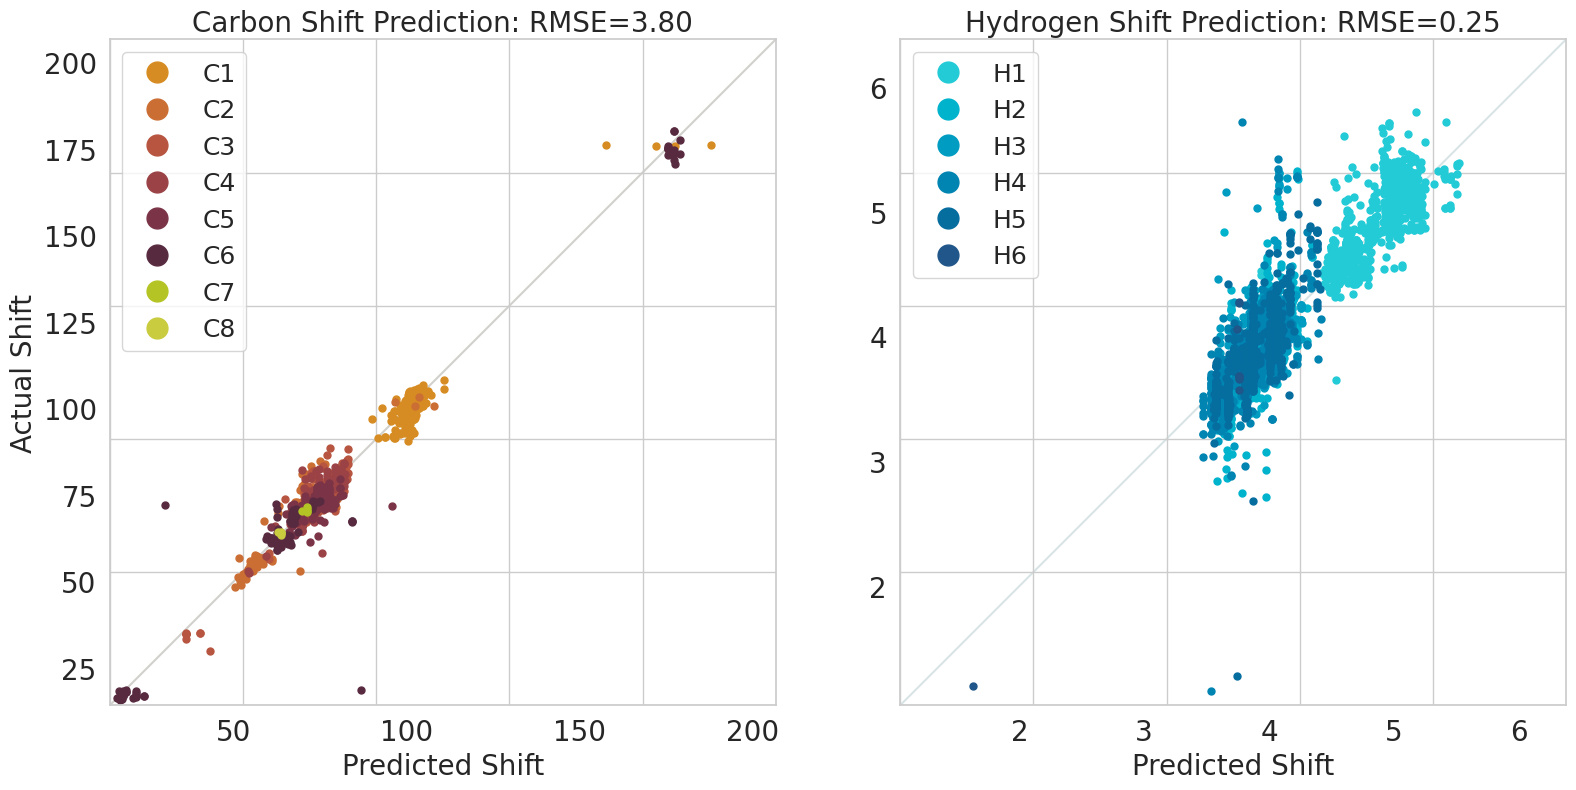

In [39]:
sns.set_theme(style="whitegrid", font_scale=1)
font_size = 20
ticksize = 20

figure, axis = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)
# figure, axis = plt.subplots(1, 1, figsize=(12, 12), constrained_layout=False)
# figure, axis = plt.subplots(3, 3, figsize=(8, 8))
figure.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad = 1, w_pad = 1)
##### For node features
# cora
# plot_infl_feature(df1, axis, 0, 0, set_title_name='$\it{Cora}$', 
#                   xlab_name='Pred. Feat. Infl.', ylab_name = 'Act. Embed. Infl.')

plot_shift(df_C_all, axis, i = 0, set_title_name = 'Carbon Shift Prediction: RMSE=3.80', sep = 5, xlab_name = 'Predicted Shift', 
           ylab_name = 'Actual Shift', color = '#4F4536', groups=groups_c, 
           color_plate_dict = colors_c, ms = 5)

plot_shift(df_H_all, axis, i = 1, set_title_name = 'Hydrogen Shift Prediction: RMSE=0.25', sep = 5, xlab_name = 'Predicted Shift', 
           ylab_name = '', color = '#679399', groups=groups_h, 
          color_plate_dict=colors_h, ms = 5)
# plt.tick_params(labelsize=20)
plt.show()

In [40]:
figure.savefig('figures/gcn_all.png', dpi=300)